#❗Avoid re-running any code in this notebook! Please reference only.
> Re-running the cells could result in loss of checkpoints for data augmentation steps, or a massive overwriting of files to Google Drive.

# Imports

In [ ]:
# mount our Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import time
import os
import numpy as np
import torch
import torchvision
from torchvision import datasets, models, transforms
import matplotlib.pyplot as plt
from PIL import Image
from torch.utils.data import DataLoader
import torchvision.transforms.functional as F

#Data Augmentation
>This notebook builds off of the original data splitting performed in the Data Imputation notebook, linked [here](https://colab.research.google.com/drive/1gy096kDS_pPapCc97x5Zhw9oSJybSaE4?usp=sharing). Basically, we are now taking the data that we have split into train, valid and test, and are rotating images on a per class basis to build up our number of sample images of higher classes, to create a more balanced data set. The general steps in the process are as follows:


1.   Create a train data loader with batch size 1
2.   Determine the number of images of each class in our train data
3.   Rotate the images in each class a certain number of times (ie. we rotate classes we are missing more images from, more times, to supplement the data set)
4. Write these rotated image tensors to images and save back in the google drive
5. Repeat for validation data.

Note: currently we are not augmenting the test data. May change this in the future.



## Image statistics BEFORE we performed data augmentation
> Do not run the below code. Just for demonstration and documentation purposes, to show how we expanded the training set from 1500 to 6000 images.

In [ ]:
# defining data directories
data_dir = '/content/drive/MyDrive/APS360_Team_11_Project_Folder/HurriScan_Data/new_split_data'
train_dir = os.path.join(data_dir, 'train/')
val_dir = os.path.join(data_dir, 'val/')
test_dir = os.path.join(data_dir, 'test/')

# classes are folders in each directory with these names
classes = ['0', '1', '2', '3', '4', '5']

# resize all images to 224 x 224
data_transform = transforms.Compose([transforms.RandomResizedCrop(224), transforms.ToTensor()])

train_data = datasets.ImageFolder(train_dir, transform=data_transform)
val_data = datasets.ImageFolder(val_dir, transform=data_transform)
test_data = datasets.ImageFolder(test_dir, transform=data_transform)

# print out some data stats
print('Num training images: ', len(train_data))
print('Num validation images: ', len(val_data))
print('Num test images: ', len(test_data))

Num training images:  1535
Num validation images:  511
Num validation images:  517


>Updated image statistics AFTER we performed augmentation on the TRAINING set

In [ ]:
# defining data directories
data_dir = '/content/drive/MyDrive/APS360_Team_11_Project_Folder/HurriScan_Data/new_split_data'
train_dir = os.path.join(data_dir, 'train/')
val_dir = os.path.join(data_dir, 'val/')
test_dir = os.path.join(data_dir, 'test/')

# classes are folders in each directory with these names
classes = ['0', '1', '2', '3', '4', '5']

# resize all images to 224 x 224
data_transform = transforms.Compose([transforms.RandomResizedCrop(224), transforms.ToTensor()])

train_data = datasets.ImageFolder(train_dir, transform=data_transform)
val_data = datasets.ImageFolder(val_dir, transform=data_transform)
test_data = datasets.ImageFolder(test_dir, transform=data_transform)

# print out some data stats
print('Num training images: ', len(train_data))
print('Num validation images: ', len(val_data))
print('Num test images: ', len(test_data))

Num training images:  6854
Num validation images:  511
Num validation images:  517


>Updated image statistics AFTER we performed augmentation on the VALID set

In [ ]:
# defining data directories
data_dir = '/content/drive/MyDrive/APS360_Team_11_Project_Folder/HurriScan_Data/new_split_data'
train_dir = os.path.join(data_dir, 'train/')
val_dir = os.path.join(data_dir, 'val/')
test_dir = os.path.join(data_dir, 'test/')

# classes are folders in each directory with these names
classes = ['0', '1', '2', '3', '4', '5']

# resize all images to 224 x 224
data_transform = transforms.Compose([transforms.RandomResizedCrop(224), transforms.ToTensor()])

train_data = datasets.ImageFolder(train_dir, transform=data_transform)
val_data = datasets.ImageFolder(val_dir, transform=data_transform)
test_data = datasets.ImageFolder(test_dir, transform=data_transform)

# print out some data stats
print('Num training images: ', len(train_data))
print('Num validation images: ', len(val_data))
print('Num test images: ', len(test_data))

Num training images:  6854
Num validation images:  2279
Num test images:  517




---

# Examining class distribution before and after data augmentation

>Previously we explored purely the number of images in each of training, validation and test sets. Now we will show the before and after statistics for each class, to show the imapct of augmentation on supplementing our higher classes with sample images for the model to learn to train on.

> BEFORE performing augmentation on the TRAINING DATA

In [ ]:
# now, we want to see how many images we have of each respective class:
ones = 0
twos = 0
threes = 0
fours = 0
fives = 0

for img, label in train_data:
  if(label == 1):
      ones+=1
  elif(label == 2):
      twos+=1
  elif(label ==3):
      threes+=1
  elif(label == 4):
      fours+=1
  elif(label == 5):
      fives+=1

print("Class one: ", ones)
print("Class two: ", twos)
print("Class three: ", threes)
print("Class four: ", fours)
print("Class five: ", fives)

Class one:  231
Class two:  72
Class three:  43
Class four:  42
Class five:  9


> AFTER performing data augmentations on the TRAINING data

In [ ]:
# now, we want to see how many images we have of each respective class:
zeros = 0
ones = 0
twos = 0
threes = 0
fours = 0
fives = 0

for img, label in train_data:
  if(label == 0):
      zeros+=1
  elif(label == 1):
      ones+=1
  elif(label == 2):
      twos+=1
  elif(label ==3):
      threes+=1
  elif(label == 4):
      fours+=1
  elif(label == 5):
      fives+=1

print("Class zero: ", zeros)
print("Class one: ", ones)
print("Class two: ", twos)
print("Class three: ", threes)
print("Class four: ", fours)
print("Class five: ", fives)

Class zero:  1138
Class one:  1386
Class two:  1152
Class three:  1075
Class four:  1050
Class five:  1053


> BEFORE data augmentation, stast for VALIDATION data

In [ ]:
# now, we want to see how many images we have of each respective class in our validation loader:
zeros = 0
ones = 0
twos = 0
threes = 0
fours = 0
fives = 0

for img, label in val_data:
  if(label == 0):
      zeros+=1
  elif(label == 1):
      ones+=1
  elif(label == 2):
      twos+=1
  elif(label ==3):
      threes+=1
  elif(label == 4):
      fours+=1
  elif(label == 5):
      fives+=1

print("Class zero: ", zeros)
print("Class one: ", ones)
print("Class two: ", twos)
print("Class three: ", threes)
print("Class four: ", fours)
print("Class five: ", fives)

Class zero:  379
Class one:  77
Class two:  24
Class three:  14
Class four:  14
Class five:  3


> AFTER data augmentation, stats for VALIDATION loader

In [ ]:
# now, we want to see how many images we have of each respective class in our validation loader:
zeros = 0
ones = 0
twos = 0
threes = 0
fours = 0
fives = 0

for img, label in val_data:
  if(label == 0):
      zeros+=1
  elif(label == 1):
      ones+=1
  elif(label == 2):
      twos+=1
  elif(label ==3):
      threes+=1
  elif(label == 4):
      fours+=1
  elif(label == 5):
      fives+=1

print("Class zero: ", zeros)
print("Class one: ", ones)
print("Class two: ", twos)
print("Class three: ", threes)
print("Class four: ", fours)
print("Class five: ", fives)

Class zero:  379
Class one:  462
Class two:  384
Class three:  350
Class four:  350
Class five:  354


# Actually performing data augmentation

> Began by determining our number of class 0 images in the training set, so we would have a rough number we would want all our other class amounts to approzimate. Knew from the below calcualtion that we would have to apply however many rotations until we had each class at around 1000 sample images.

In [ ]:
numClassZero = len(train_data) - ones - twos - threes - fours - fives
print("We have this many of class 0: ", numClassZero)

We have this many of class 0:  1138


# Visual display of augmented data

> The below code shows for a SINGLE SAMPLE IMAGE how we can rotate to create multiple sample images, with more differences than just duplicating the image multiple times. We had to be careful about the augmentations we peformed on our images, because stretching or blocking out portions of the image could mess with the models ability to predict the hurricane, or even change the classification. Rotations were simple yet effecitve means of augmenting the data set.

> Display of single sample image

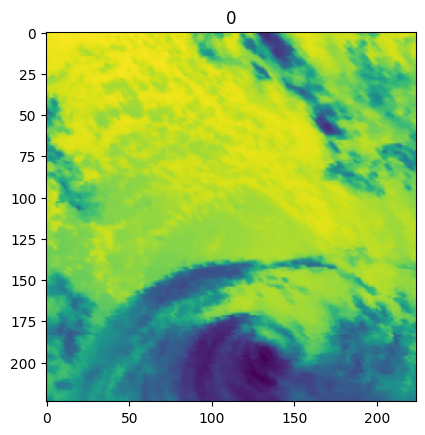

In [ ]:
for img, label in train_data:
  img = img.numpy() # convert images to numpy for display
  plt.imshow(np.transpose(img, (1, 2, 0)))
  plt.title(classes[label])
  break


> And then display of the rotation augmentations

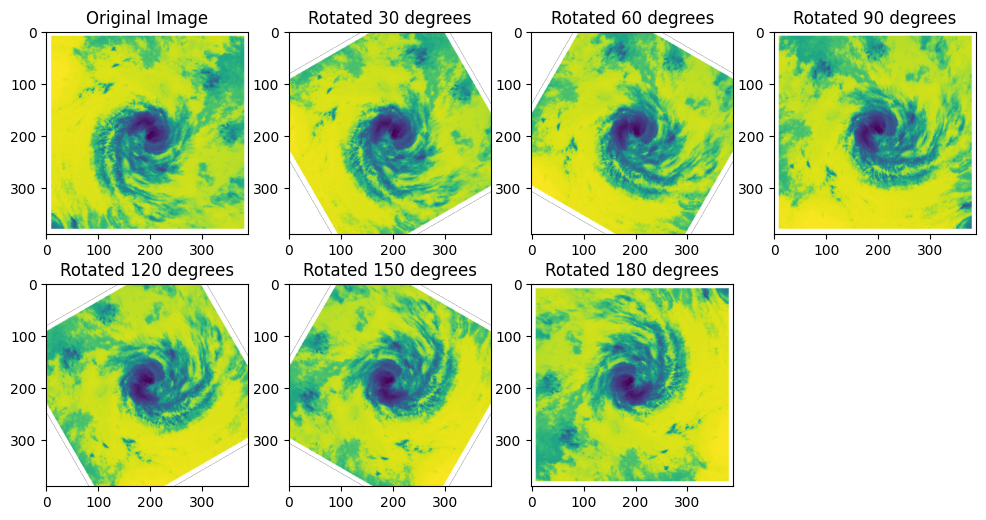

In [ ]:
angles = [30, 60, 90, 120, 150, 180]

original_image = Image.open("/content/1101_class=1.png")

# Create copies of the rotated image
rotated_images = []
for angle in angles:
    rotated_image = original_image.rotate(angle)
    rotated_images.append(rotated_image)

# Display the original and rotated images
plt.figure(figsize=(12, 6))
plt.subplot(2, 4, 1)
plt.imshow(original_image)
plt.title('Original Image')

for i, angle in enumerate(angles):
    plt.subplot(2, 4, i + 2)
    plt.imshow(rotated_images[i])
    plt.title(f'Rotated {angle} degrees')

plt.show()

# And then we implemented this on a per-class basis

> Began by defining data loaders for each data set with a batch size of 1

In [ ]:
batch_size = 1
train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True)

In [ ]:
batch_size = 1
valid_loader = DataLoader(val_data, batch_size=batch_size, shuffle=True)

> And then for each class, and for both training and validation, we created a rotated_images_x array to store the rotated tensors, that we eventually write to Google Drive. Note that the writing to Google Drive SHOULD NOT BE PERFORMED AGAIN, otherwise, we will double our images in the folder.

In [ ]:
# for class 5
angles = np.radians(np.arange(10, 361, 3, dtype=int))
rotated_images = []
for imgs, labels in train_loader:
  if(labels[0] == 5):
    # img = img.numpy() # convert images to numpy for display

    for angle in angles:
        image = F.to_pil_image(imgs[0])
        rotated_image = F.rotate(image, angle=angle)
        rotated_tensor = F.to_tensor(rotated_image)
        rotated_images.append(rotated_tensor)

In [ ]:
print(len(rotated_images))

1053


In [ ]:
# for class 4
angles = np.radians(np.arange(10, 361, 15, dtype=int))
rotated_images_4 = []
for imgs, labels in train_loader:
  if(labels[0] == 4):
    # img = img.numpy() # convert images to numpy for display

    for angle in angles:
        image = F.to_pil_image(imgs[0])
        rotated_image = F.rotate(image, angle=angle)
        rotated_tensor = F.to_tensor(rotated_image)
        rotated_images_4.append(rotated_tensor)

In [ ]:
print(len(rotated_images_4))

1008


In [ ]:
# for class 3
angles = np.radians(np.arange(10, 361, 15, dtype=int))
rotated_images_3 = []
for imgs, labels in train_loader:
  if(labels[0] == 3):
    # img = img.numpy() # convert images to numpy for display

    for angle in angles:
        image = F.to_pil_image(imgs[0])
        rotated_image = F.rotate(image, angle=angle)
        rotated_tensor = F.to_tensor(rotated_image)
        rotated_images_3.append(rotated_tensor)

In [ ]:
print(len(rotated_images_3))

1032


In [ ]:
# for class 2
angles = np.radians(np.arange(10, 361, 25, dtype=int))
rotated_images_2 = []
for imgs, labels in train_loader:
  if(labels[0] == 2):
    # img = img.numpy() # convert images to numpy for display

    for angle in angles:
        image = F.to_pil_image(imgs[0])
        rotated_image = F.rotate(image, angle=angle)
        rotated_tensor = F.to_tensor(rotated_image)
        rotated_images_2.append(rotated_tensor)

In [ ]:
print(len(rotated_images_2))

1080


In [ ]:
# for class 1
angles = np.radians(np.arange(10, 361, 75, dtype=int))
rotated_images_1 = []
for imgs, labels in train_loader:
  if(labels[0] == 1):
    # img = img.numpy() # convert images to numpy for display

    for angle in angles:
        image = F.to_pil_image(imgs[0])
        rotated_image = F.rotate(image, angle=angle)
        rotated_tensor = F.to_tensor(rotated_image)
        rotated_images_1.append(rotated_tensor)

In [ ]:
print(len(rotated_images_1))

1155


> If needed to re-run the below code, would need to update several variables in the below directory code as well as the rotated_images_x tensor that we enumerate over and the class=x definition in the filename.

In [ ]:
os.makedirs('/content/drive/MyDrive/APS360_Team_11_Project_Folder/HurriScan_Data/new_split_data/train/1/', exist_ok=True)

for i, rotated_tensor in enumerate(rotated_images_1):
    filename = f"{'/content/drive/MyDrive/APS360_Team_11_Project_Folder/HurriScan_Data/new_split_data/train/1/'}rotated_image_{i}_class=1.png"
    img = transforms.ToPILImage()(rotated_tensor)
    img.save(filename)

print("Images saved successfully.")

Images saved successfully.


> Repeat for validation

In [ ]:
# for class 4 valid
angles = np.radians(np.arange(10, 361, 15, dtype=int))
valid_rotated_images_4 = []
for imgs, labels in valid_loader:
  if(labels[0] == 4):
    # img = img.numpy() # convert images to numpy for display

    for angle in angles:
        image = F.to_pil_image(imgs[0])
        rotated_image = F.rotate(image, angle=angle)
        rotated_tensor = F.to_tensor(rotated_image)
        valid_rotated_images_4.append(rotated_tensor)

In [ ]:
print(len(valid_rotated_images_4))

336


In [ ]:
# for class 3 valid
angles = np.radians(np.arange(10, 361, 15, dtype=int))
valid_rotated_images_3 = []
for imgs, labels in valid_loader:
  if(labels[0] == 3):
    # img = img.numpy() # convert images to numpy for display

    for angle in angles:
        image = F.to_pil_image(imgs[0])
        rotated_image = F.rotate(image, angle=angle)
        rotated_tensor = F.to_tensor(rotated_image)
        valid_rotated_images_3.append(rotated_tensor)

In [ ]:
print(len(valid_rotated_images_3))

336


In [ ]:
# for class 2 valid
angles = np.radians(np.arange(10, 361, 25, dtype=int))
valid_rotated_images_2 = []
for imgs, labels in valid_loader:
  if(labels[0] == 2):
    # img = img.numpy() # convert images to numpy for display

    for angle in angles:
        image = F.to_pil_image(imgs[0])
        rotated_image = F.rotate(image, angle=angle)
        rotated_tensor = F.to_tensor(rotated_image)
        valid_rotated_images_2.append(rotated_tensor)

In [ ]:
print(len(valid_rotated_images_2))

360


In [ ]:
# for class 1
angles = np.radians(np.arange(10, 361, 75, dtype=int))
valid_rotated_images_1 = []
for imgs, labels in valid_loader:
  if(labels[0] == 1):
    # img = img.numpy() # convert images to numpy for display

    for angle in angles:
        image = F.to_pil_image(imgs[0])
        rotated_image = F.rotate(image, angle=angle)
        rotated_tensor = F.to_tensor(rotated_image)
        valid_rotated_images_1.append(rotated_tensor)

In [ ]:
print(len(valid_rotated_images_1))

385


In [ ]:
os.makedirs('/content/drive/MyDrive/APS360_Team_11_Project_Folder/HurriScan_Data/new_split_data/val/1/', exist_ok=True)

for i, rotated_tensor in enumerate(valid_rotated_images_1):
    filename = f"{'/content/drive/MyDrive/APS360_Team_11_Project_Folder/HurriScan_Data/new_split_data/val/1/'}rotated_image_{i}_class=1.png"
    img = transforms.ToPILImage()(rotated_tensor)
    img.save(filename)

print("Images saved successfully.")

Images saved successfully.


> Also, some helpful code for deleting all images in a folder.

In [ ]:
import os

# Specify the folder path in your Google Drive
drive_folder_path = "/content/drive/MyDrive/APS360_Team_11_Project_Folder/HurriScan_Data/new_split_data/train/"

# Get a list of all files in the specified folder
files = os.listdir(drive_folder_path)

# Delete each image file in the folder
for file in files:
    file_path = os.path.join(drive_folder_path, file)
    # Check if the file is an image file (you can customize this check based on your file naming conventions)
    if file.endswith(('.png', '.jpg', '.jpeg')):
        os.remove(file_path)

print("Images deleted successfully.")

Images deleted successfully.
